Import dependance

•	Why it matters: Health insurance costs are rising globally, influenced by age, health behaviors (e.g., smoking, obesity), regional medical costs, etc. Accurately predicting these helps insurers price fairly, manage risk, and assist individuals in planning
•	Future scope: The methodology can generalize to other insurance types (auto, life, property), adapting similar modeling and feature analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data collection & analysis

In [ ]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


insurance_dataset.head(/content/insurance.csv)

In [ ]:
#number of rows and column
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some information of dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical feature :
sex , smoker, region .

In [ ]:
insurance_dataset['age'].max()


64

In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Data analysis**

statisrical measure the dataset( y is used bescause Enhancing Communication,Informing Decision-Making,Identifying Patterns and Trends, Understanding Variability,Summarizing Data)

25th Percentile (Q1): Also known as the first quartile; 25% of data falls below this value.


50th Percentile (Median): The middle value; half of the data falls below this point.

75th Percentile (Q3): Also known as the third quartile; 75% of data falls below this value

In [ ]:
#statisrical measure the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

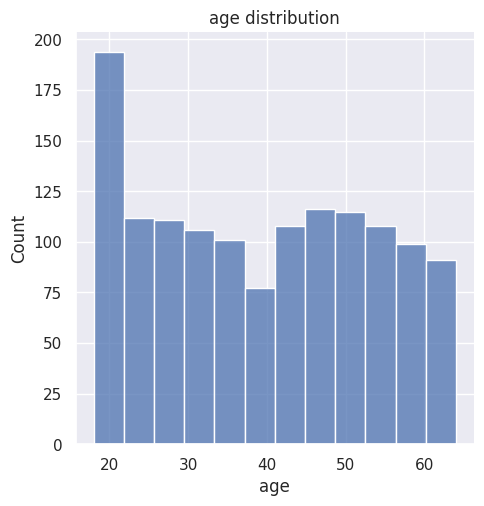

In [ ]:
#distrubution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

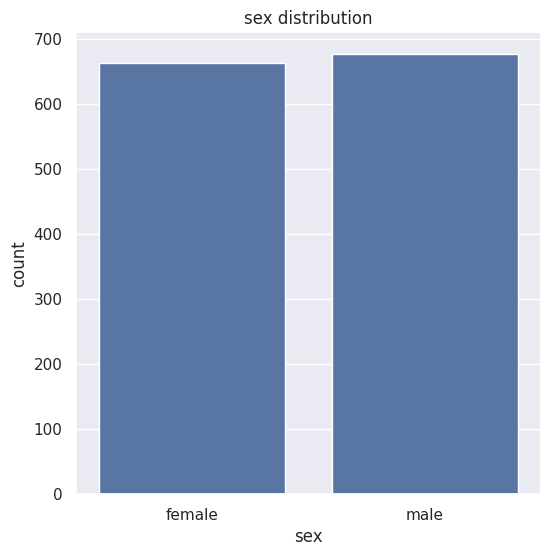

In [ ]:
#gender column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


FACTS

Underweight: BMI less than 18.5

Normal weight: BMI 18.5–24.9

Overweight: BMI 25.0–29.9

<Figure size 600x600 with 0 Axes>

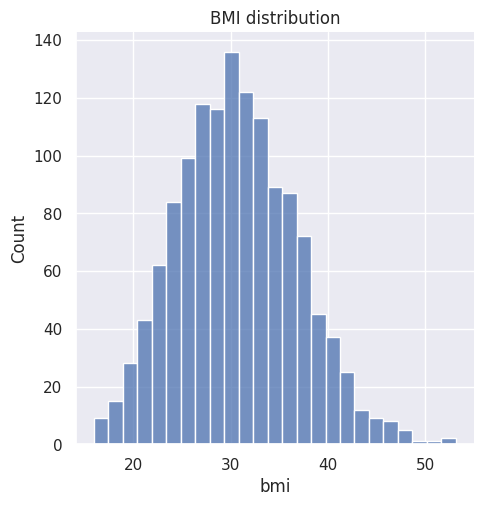

In [ ]:
# bmi distribution (body mass index calculated using height and weight )
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

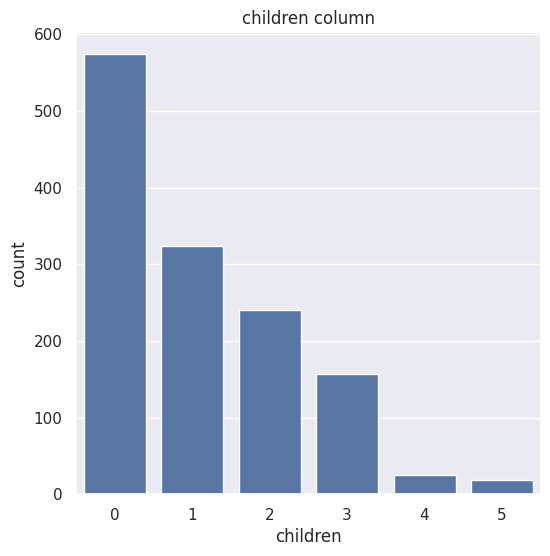

In [ ]:
# number of children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children column')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


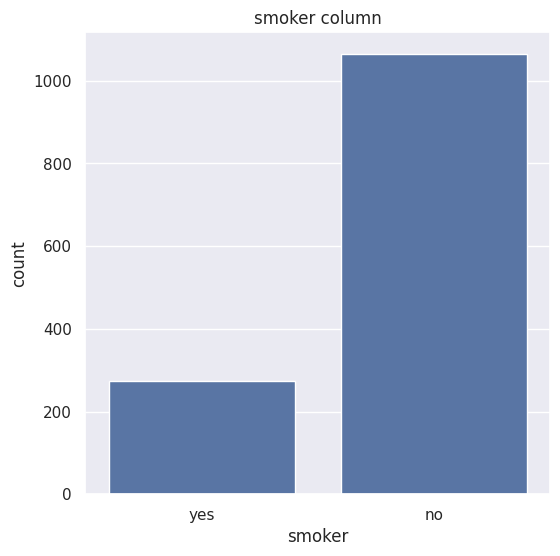

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker column')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


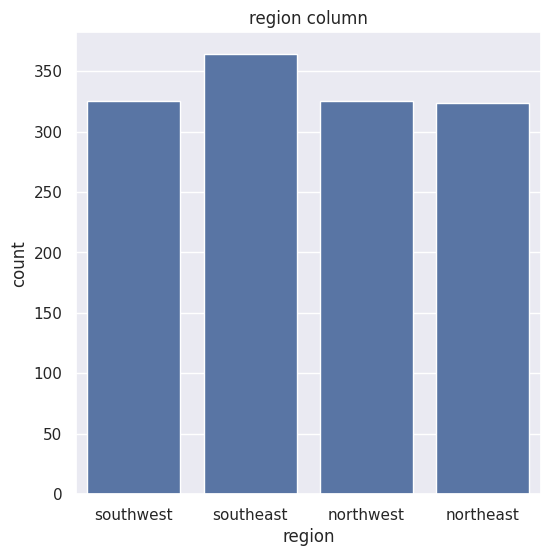

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region column')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

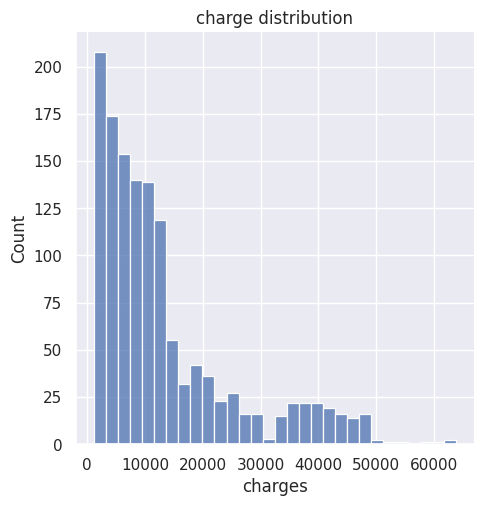

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('charge distribution')
plt.show()

**data preprocessing**
ML cant understnd the catogorical value  like (sex , smoker, region) female male ,yes no , region west east north south so we represented them in numerical form this is called encoding

In [ ]:
#Encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-20-432f5960cbe2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-20-432f5960cbe2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-20-432f5960cbe2>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [ ]:
pd.DataFrame(insurance_dataset)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


#Encoding categorical features using one-hot encoding
# We will apply get_dummies to 'sex', 'smoker', and 'region'
# Drop the original categorical columns afterwards

In [ ]:
df_encoded = pd.get_dummies(insurance_dataset, columns=['sex','smoker', 'region'], drop_first=True)

splitting the features (age , sex ,children ,smoker,region ) and target(charges) (for column axis= 1 for row axis= 0)



In [ ]:
x=df_encoded.drop(columns='charges',axis=1)
y=df_encoded['charges']

In [ ]:
print(x)

      age     bmi  children  sex_1  smoker_1  region_1  region_2  region_3
0      19  27.900         0   True     False      True     False     False
1      18  33.770         1  False      True     False     False     False
2      28  33.000         3  False      True     False     False     False
3      33  22.705         0  False      True     False     False      True
4      32  28.880         0  False      True     False     False      True
...   ...     ...       ...    ...       ...       ...       ...       ...
1333   50  30.970         3  False      True     False     False      True
1334   18  31.920         0   True      True     False      True     False
1335   18  36.850         0   True      True     False     False     False
1336   21  25.800         0   True      True      True     False     False
1337   61  29.070         0   True     False     False     False      True

[1338 rows x 8 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spliting the data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 8) (1070, 8) (268, 8)


Model trainning

Linear regression

In [ ]:
regressor = LinearRegression()


In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

Model evalation

In [ ]:
#predection on training data
Training_data_predection = regressor.predict(x_train)

In [ ]:
#R squared value
r2_train = metrics.r2_score(y_train,Training_data_predection)
print('R squared value :',r2_train)

R squared value : 0.7520187377309014


In [ ]:
#predection on test data
Test_data_predection = regressor.predict(x_test)

In [ ]:
#R squared value
r2_test = metrics.r2_score(y_test,Test_data_predection)
print('R squared value :',r2_test)

R squared value : 0.7449415564623685


**Final stage**
Build a predictive system

reshape means (1,-1) need only one value



In [ ]:
input_data = (31,1,25.74,0,1,0,0,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[10673.15534948]
The insurance cost is USD  10673.155349480417


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1. Why This Project Matters
Cost Control in Healthcare
Accurately forecasting health insurance expenses enables insurers to set fair, personalized premiums, reducing the risk of financial loss and enhancing competitiveness

.

2. Risk Management & Adverse Selection
Premiums adjusted for risk factors (e.g., smoking, age) mitigate adverse selection, ensuring low-risk individuals remain covered
en.wikipedia.org
.

3. Policy & Market Impact
Predictive models help insurers tailor plans, incentivize healthy behaviors (value-based design), and inform policy adjustments in evolving markets